## 信用评估模型
kaggle链接:https://www.kaggle.com/c/GiveMeSomeCredit

信用评分算法，用于猜测违约概率，银行可以用来确定是否应该授予贷款。

该竞赛要求参与者通过预测某人在未来两年内遇到财务困境的可能性来改进信用评分的现有技术水平。

要求使用AUC(Area Under ROC Curve)作为性能性能评估标准。

In [ ]:
import os
import zipfile
from urllib import request as req

FILE_NAME = "GiveMeSomeCredit.zip"  # 文件名
DATA_PATH ="datasets/GiveMeSomeCredit"  # 存储文件的文件夹，取跟文件相同（相近）的名字便于区分
DATA_URL = "https://github.com/824024445/KaggleCases/blob/master/datasets/" + FILE_NAME + "?raw=true"

# 下载数据
def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_name=FILE_NAME):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, file_name)
    req.urlretrieve(data_url, zip_path)
    data_zip = zipfile.ZipFile(zip_path)
    data_zip.extractall(data_path)
    data_zip.close()
fetch_data()

In [58]:
import pandas as pd

# 观察数据
train_df = pd.read_csv("datasets/GiveMeSomeCredit/cs-training.csv")
test_df = pd.read_csv("datasets/GiveMeSomeCredit/cs-test.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [59]:
# "MonthlyIncome","NumberOfDependents" 字段有缺失值
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BC4F5A4E0>,
      dtype=object)

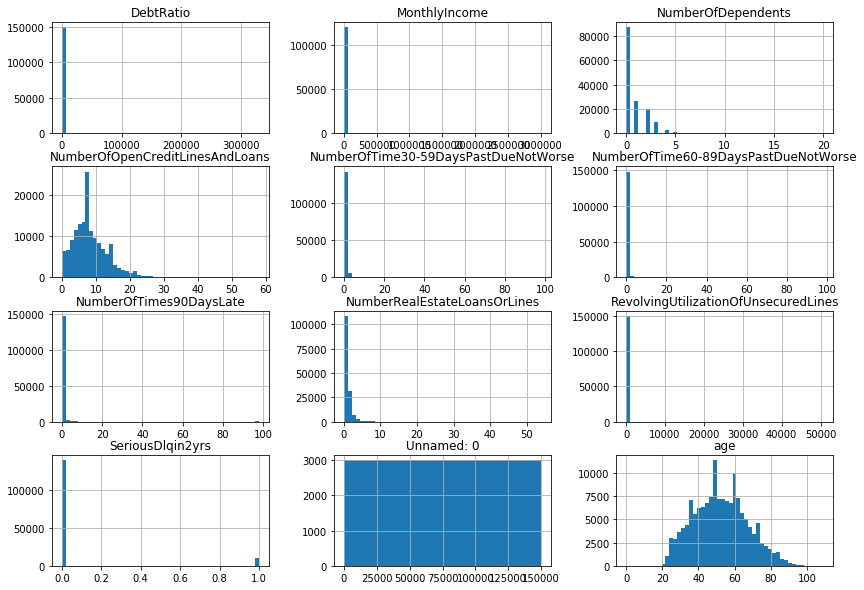

In [60]:
train_df.hist(bins=50, figsize=(14, 10))

In [61]:
# 查找特征之前的关联，尝试找出新特征
corr_metrix = train_df.corr()
corr_metrix["SeriousDlqin2yrs"].sort_values(ascending=False)

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046048
Unnamed: 0                              0.002801
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.019746
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64

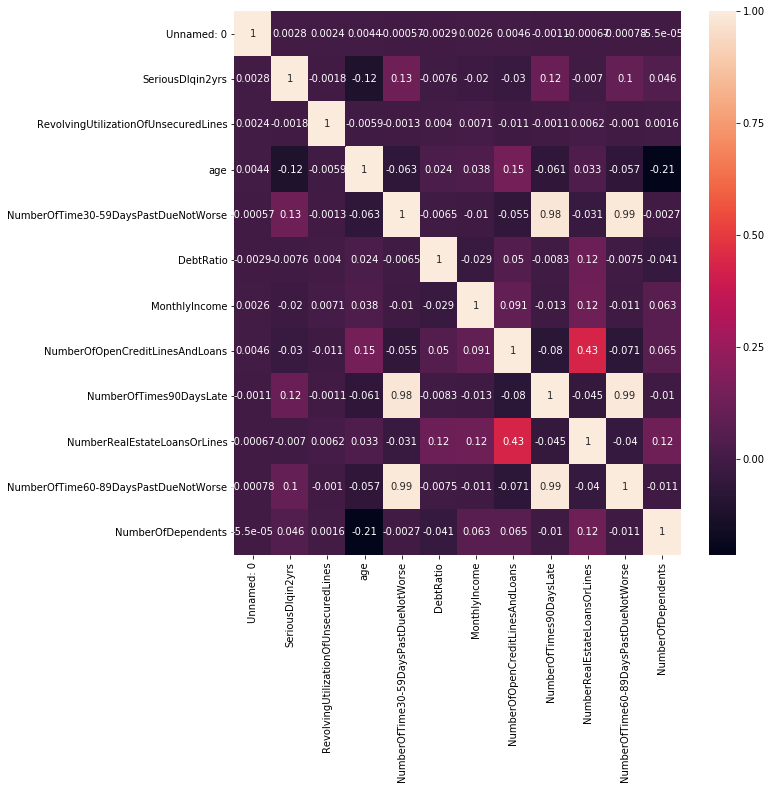

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_metrix, xticklabels=corr_metrix.columns,
            yticklabels=corr_metrix.columns, annot=True)
plt.show()

In [63]:
# 数据处理：1，缺失值 2，异常值
# 缺失值
combine = [train_df, test_df]
for data in combine:
    data["MonthlyIncome"].fillna(data["MonthlyIncome"].mean(), inplace=True)
    data["NumberOfDependents"].fillna(data["MonthlyIncome"].mode()[0], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [64]:
# 异常值  "NumberOfDependents" 家属数量不可能有6000多个
train_df["NumberOfDependents"].value_counts()

0.000000       86902
1.000000       26316
2.000000       19522
3.000000        9483
6670.221237     3924
4.000000        2862
5.000000         746
6.000000         158
7.000000          51
8.000000          24
9.000000           5
10.000000          5
13.000000          1
20.000000          1
Name: NumberOfDependents, dtype: int64

In [65]:
# 将异常样本的家属数量置为0
for data in combine:
    data["NumberOfDependents"][data["NumberOfDependents"] > 30] = 0
data["NumberOfDependents"].value_counts()

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.0     61245
1.0     17618
2.0     13298
3.0      6623
4.0      1995
5.0       526
6.0       125
7.0        50
8.0        16
9.0         3
10.0        3
20.0        1
Name: NumberOfDependents, dtype: int64

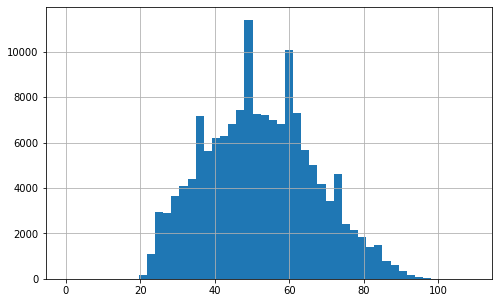

In [66]:
train_df["age"].hist(bins=50, figsize=(8, 5))

In [67]:
# 年龄值不可能为0岁
train_df["age"].sort_values()[:10]

65695      0
68450     21
144194    21
103152    21
99303     21
15239     21
22748     21
41046     21
149686    21
4705      21
Name: age, dtype: int64

In [68]:
train_df = train_df[train_df["age"]>18]
test_df = test_df[test_df["age"]>18]
combine = [train_df, test_df]

In [82]:
# 用干净的数据，尝试构造新特征

for data in combine:
    data["CombinedDefaulted"] = data["NumberOfTimes90DaysLate"] + data["NumberOfTime30-59DaysPastDueNotWorse"] + data["NumberOfTime60-89DaysPastDueNotWorse"]
    data.loc[(data["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1
    data["CombinedCreditLoans"] = data["NumberOfOpenCreditLinesAndLoans"] + data["NumberRealEstateLoansOrLines"]
    data.loc[(data["CombinedCreditLoans"]<=5), "CombinedCreditLoans"] = 0
    data.loc[(data["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1

In [87]:
train_df.corr()["SeriousDlqin2yrs"][["CombinedDefaulted", "CombinedCreditLoans"]]

CombinedDefaulted      0.314415
CombinedCreditLoans   -0.054778
Name: SeriousDlqin2yrs, dtype: float64

In [89]:
# 模型和预测
# 重新切分数据集
attributes=["SeriousDlqin2yrs", 'age','NumberOfTime30-59DaysPastDueNotWorse',
            'NumberOfDependents','MonthlyIncome',"CombinedDefaulted","CombinedCreditLoans"]
sol=['SeriousDlqin2yrs']

attributes2 = ["Unnamed: 0", 'age','NumberOfTime30-59DaysPastDueNotWorse','NumberOfDependents',
               'MonthlyIncome',"CombinedDefaulted","CombinedCreditLoans"]
train_df = train_df[attributes]
test_df = test_df[attributes2]

In [94]:
# 训练模型
import time
from sklearn.model_selection import cross_validate

class Tester(object):
    def __init__(self, targrt):
        self.target = targrt
        self.models = {}
        self.datasets = {}
        self.cache = {}  # 一个简单的缓存
        
    def addModel(self, m_name, model):
        self.models[m_name] = model
        
    def addDataset(self, df_name, df):
        self.datasets[df_name] = df
    
    def clearModel(self):
        self.models = {}
        
    def clearCache(self):
        self.cache = {}
        
    def testModelWithDataset(self, m_name, df_name, sample_len, cv):
        if (m_name, df_name, sample_len, cv) in self.cache:
            return scores[(m_name, df_name, sample_len, cv)]
        clf = self.models[m_name]
        
        if not sample_len:
            sample = slef.datasets[df_name]
        else:
            sample = self.datasets[df_name].sample(sample_len)
            
        X = sample.drop([self.target], axis=1)
        Y = sample[self.target]
        
        s = cross_validate(clf, X, Y, scoring=["roc_auc"], cv=cv, n_jobs=-1)
        self.cache[(m_name, df_name, sample_len, cv)] = s
        return s
    
    def runTester(self, sample_len=80000, cv=4):
        scores = {}
        for m_name in self.models:
            for df_name in self.datasets:
                print("Testing %s" % str((m_name, df_name)), end='')
                
                start = time.time()
                score = self.testModelWithDataset(m_name, df_name, sample_len, cv)
                scores[((m_name, df_name, sample_len, cv))] = score
                end = time.time()
                        
                print(' -- %0.2fs ' % (end - start))
        
        print("----TOP 10 RESULT----")
        for score in sorted(scores.items(), key=lambda x: -1 * x[1]['test_roc_auc'].mean())[:10]:
            auc = score[1]['test_roc_auc']
            print("%s --> AUC: %0.4f (+/- %0.4f)" % (str(score[0]), auc.mean(), auc.std()))
        

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 在所有模型中使用测试对象
tester = Tester("SeriousDlqin2yrs")

# 添加数据集
tester.addDataset("drop missing", train_df.dropna())

# 添加模型
rfc = RandomForestClassifier(n_estimators=15, max_depth=6, random_state=0)
log = LogisticRegression()

tester.addModel("simple rfc", rfc)
tester.addModel("simple log", log)

# 测试
tester.runTester()

Testing ('simple rfc', 'drop missing') -- 0.99s 
Testing ('simple log', 'drop missing') -- 1.28s 
----TOP 10 RESULT----
('simple rfc', 'drop missing', 80000, 4) --> AUC: 0.8149 (+/- 0.0024)
('simple log', 'drop missing', 80000, 4) --> AUC: 0.7916 (+/- 0.0128)


In [100]:
# 随即森立auc较高一些
x_train = train_df.drop(["SeriousDlqin2yrs"], axis=1)
y_train = train_df["SeriousDlqin2yrs"]

x_test = test_df.drop(["Unnamed: 0"],axis=1)

rfc.fit(x_train, y_train)

y_predict = rfc.predict_proba(x_test)

In [102]:
# kaggle提交结果

submission = pd.DataFrame({
        "Id": test_df["Unnamed: 0"],
        "Probability": pd.DataFrame(y_predict)[1]
    })

submission.to_csv('submission.csv', index=False)